# Cardiovascular Disease Analysis - Task 2: Data Cleaning and Preprocessing


---
## 1. Load Data and Setup


### Q1: Load the Dataset and Create a Working Copy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import iqr

df = pd.read_csv('cardio_train.csv', sep=';')

# Create a working copy
df_clean = df.copy()

### Q2: Verify Data Integrity Before Preprocessing


In [2]:
print("Initial Data Info:")
df_clean.info()
print("\nInitial Data Head:")
print(df_clean.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

Initial Data Head:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  2022

---
## 2. Missing Values Handling


### Q3: Check and Handle Missing Values


In [5]:
missing_values = df_clean.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


---
## 3. Outlier Detection Using IQR Method


### Q4: Detect Outliers in Blood Pressure (ap_hi) Using IQR Method


In [7]:
# Function to get IQR bounds
def get_iqr_bounds(data, column,multiplier=2):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

ap_hi_low, ap_hi_high = get_iqr_bounds(df_clean, 'ap_hi')
print(f"ap_hi IQR Lower Bound: {ap_hi_low}")
print(f"ap_hi IQR Upper Bound: {ap_hi_high}")
print(f"Count of ap_hi outliers: {len(df_clean[(df_clean['ap_hi'] < ap_hi_low) | (df_clean['ap_hi'] > ap_hi_high)])}")

ap_hi IQR Lower Bound: 80.0
ap_hi IQR Upper Bound: 180.0
Count of ap_hi outliers: 576


### Q5: Detect Outliers in Blood Pressure (ap_lo) Using IQR Method


In [9]:
ap_lo_low, ap_lo_high = get_iqr_bounds(df_clean, 'ap_lo')
print(f"ap_lo IQR Lower Bound: {ap_lo_low}")
print(f"ap_lo IQR Upper Bound: {ap_lo_high}")
print(f"Count of ap_lo outliers: {len(df_clean[(df_clean['ap_lo'] < ap_lo_low) | (df_clean['ap_lo'] > ap_lo_high)])}")

ap_lo IQR Lower Bound: 60.0
ap_lo IQR Upper Bound: 110.0
Count of ap_lo outliers: 1457


### Q6: Detect Outliers in Height Using IQR Method


In [11]:
height_low, height_high = get_iqr_bounds(df_clean, 'height')
print(f"Height IQR Lower Bound: {height_low}")
print(f"Height IQR Upper Bound: {height_high}")
print(f"Count of height outliers: {len(df_clean[(df_clean['height'] < height_low) | (df_clean['height'] > height_high)])}")

Height IQR Lower Bound: 137.0
Height IQR Upper Bound: 192.0
Count of height outliers: 167


### Q7: Detect Outliers in Weight Using IQR Method


In [13]:
weight_low, weight_high = get_iqr_bounds(df_clean, 'weight')
print(f"Weight IQR Lower Bound: {weight_low}")
print(f"Weight IQR Upper Bound: {weight_high}")
print(f"Count of weight outliers: {len(df_clean[(df_clean['weight'] < weight_low) | (df_clean['weight'] > weight_high)])}")

Weight IQR Lower Bound: 31.0
Weight IQR Upper Bound: 116.0
Count of weight outliers: 759


### Q8: Remove Detected Outlier Rows


In [15]:
initial_rows = len(df_clean)

# Combine filtering criteria:
# 1. Physiological BP: ap_hi between 80-250, ap_lo between 40-200, and ap_lo < ap_hi
# 2. IQR bounds for Height and Weight
df_clean = df_clean[
    # Blood Pressure Cleaning (Physiological Constraints)
    (df_clean['ap_hi'] > 80) & (df_clean['ap_hi'] < 250) &
    (df_clean['ap_lo'] > 40) & (df_clean['ap_lo'] < 200) &
    (df_clean['ap_lo'] < df_clean['ap_hi']) &

    # Anthropometric Cleaning (IQR Constraints)
    (df_clean['height'] >= height_low) & (df_clean['height'] <= height_high) &
    (df_clean['weight'] >= weight_low) & (df_clean['weight'] <= weight_high)
].copy()

print(f"Outlier removal based on physiological and IQR constraintscompleted.")

Outlier removal based on physiological and IQR constraintscompleted.


### Q9: Compare Dataset Size Before and After Outlier Removal


In [17]:
final_rows = len(df_clean)
removed_rows = initial_rows - final_rows

print(f"Initial Dataset Size: {initial_rows} rows")
print(f"Final Dataset Size: {final_rows} rows")
print(f"Rows Removed: {removed_rows} ({removed_rows/initial_rows*100:.2f}%)")

Initial Dataset Size: 70000 rows
Final Dataset Size: 67727 rows
Rows Removed: 2273 (3.25%)


---
## 4. Feature Engineering


### Q10: Convert Age from Days to Years


In [19]:
df_clean['age_years'] = np.floor(df_clean['age'] / 365.25).astype(int)
print("New feature 'age_years' created.")

New feature 'age_years' created.


### Q11: Calculate BMI (Body Mass Index) = weight / (height/100)^2


In [21]:
# Height must be in meters, so divide by 100
df_clean['bmi'] = df_clean['weight'] / (df_clean['height'] / 100)**2
print("New feature 'bmi' created.")

New feature 'bmi' created.


### Q12: Create Age Group Categories (e.g., 30-40, 40-50, 50-60, 60-70)


In [23]:
# Define bins and labels
min_age = df_clean['age_years'].min()
max_age = df_clean['age_years'].max()
bins = [min_age, 40, 50, 60, max_age + 1]
labels = ['<40', '40-49', '50-59', '60+']

df_clean['age_group'] = pd.cut(df_clean['age_years'], bins=bins, labels=labels, right=False, include_lowest=True)
print("New feature 'age_group' created.")

New feature 'age_group' created.


### Q13: Drop Unnecessary Columns (id, age in days)


In [25]:
df_clean = df_clean.drop(['id', 'age'], axis=1)
print("Columns 'id' and 'age' (in days) dropped.")
print("Remaining columns:")
print(df_clean.columns.tolist())

Columns 'id' and 'age' (in days) dropped.
Remaining columns:
['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'age_group']


---
## 5. Categorical Variable Encoding


### Q14: Identify Categorical Features in Processed Dataset


In [27]:
# Categorical features are those with few unique values (binary or ordinal)
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_group']
print("Categorical Columns Identified:", categorical_cols)

Categorical Columns Identified: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_group']


### Q15: Encode Categorical Variables (Gender, Cholesterol, Glucose, etc.)


In [29]:
# Gender (1: Female, 2: Male) -> Map to Binary (0: Female, 1: Male)
df_clean['gender'] = df_clean['gender'].map({1: 0, 2: 1})
print("Gender mapped from (1, 2) to (0, 1).")

# One-Hot Encode the nominal categorical feature (age_group)
df_clean = pd.get_dummies(df_clean, columns=['age_group'], drop_first=True, prefix='age')

Gender mapped from (1, 2) to (0, 1).


### Q16: Verify All Features Are Numeric After Encoding


In [31]:
print("Final Data Types and Head after Encoding:")
df_clean.info()
print(df_clean.head())

Final Data Types and Head after Encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 67727 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       67727 non-null  int64  
 1   height       67727 non-null  int64  
 2   weight       67727 non-null  float64
 3   ap_hi        67727 non-null  int64  
 4   ap_lo        67727 non-null  int64  
 5   cholesterol  67727 non-null  int64  
 6   gluc         67727 non-null  int64  
 7   smoke        67727 non-null  int64  
 8   alco         67727 non-null  int64  
 9   active       67727 non-null  int64  
 10  cardio       67727 non-null  int64  
 11  age_years    67727 non-null  int32  
 12  bmi          67727 non-null  float64
 13  age_40-49    67727 non-null  bool   
 14  age_50-59    67727 non-null  bool   
 15  age_60+      67727 non-null  bool   
dtypes: bool(3), float64(2), int32(1), int64(10)
memory usage: 7.2 MB
   gender  height  weight  a

---
## 6. Feature Scaling and Normalization


### Q17: Separate Features (X) and Target Variable (y)


In [153]:
# # Separate features (X) and target (y)
# X = df_clean.drop('cardio', axis=1)
# y = df_clean['cardio']

# print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (67727, 15), y shape: (67727,)


### Q18: Apply StandardScaler to Normalize All Features


In [155]:
# scaler = StandardScaler()

# # Fit and transform the features
# X_scaled_array = scaler.fit_transform(X)

# # Convert the scaled array back to a DataFrame
# X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)
# print("Features scaled using StandardScaler.")

Features scaled using StandardScaler.


### Q19: Compare Feature Statistics Before and After Scaling


In [157]:
# print("\nStatistics Before Scaling (Mean, Std Dev):")
# # Sample key numerical features
# print(X[['ap_hi', 'weight', 'bmi']].agg(['mean', 'std']))

# print("\nStatistics After Scaling (Mean, Std Dev) - Expected Mean ~ 0, Std Dev ~ 1:")
# print(X_scaled[['ap_hi', 'weight', 'bmi']].agg(['mean', 'std']))


Statistics Before Scaling (Mean, Std Dev):
           ap_hi     weight        bmi
mean  126.582604  73.561413  27.256416
std    16.543104  13.163496   4.838747

Statistics After Scaling (Mean, Std Dev) - Expected Mean ~ 0, Std Dev ~ 1:
             ap_hi        weight           bmi
mean -1.429961e-16  5.090368e-16  7.448807e-17
std   1.000007e+00  1.000007e+00  1.000007e+00


---
## 7. Data Visualization After Preprocessing


### Q20: Create Count Plot for Binary Features (Smoke, Alcohol, Active)


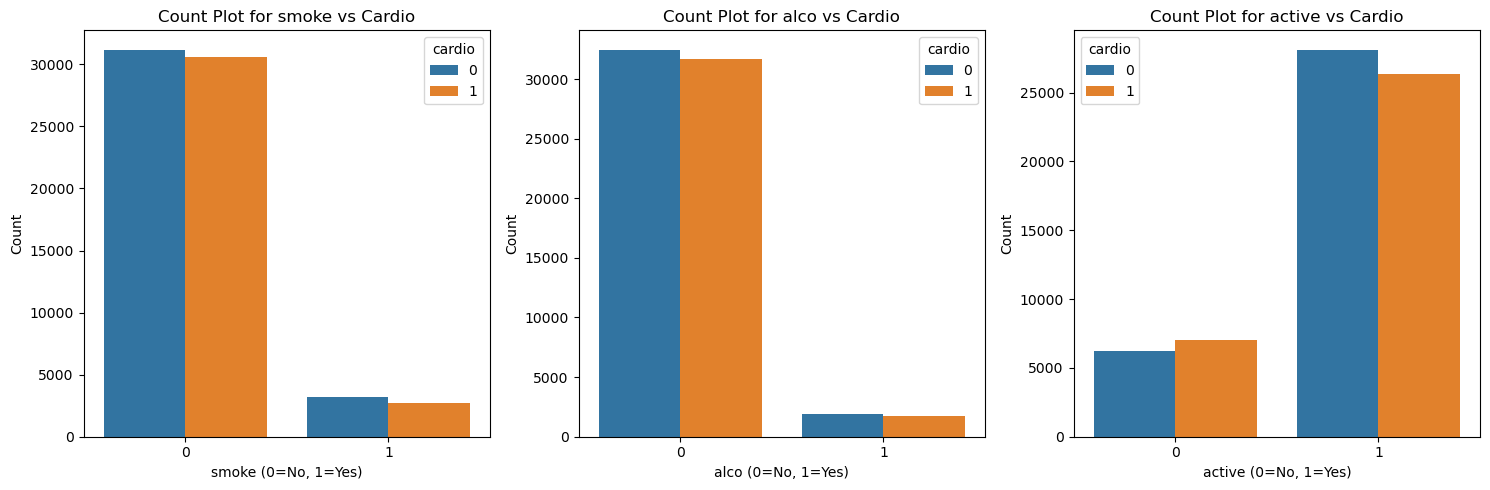

In [33]:
binary_features = ['smoke', 'alco', 'active']
plt.figure(figsize=(15, 5))
for i, col in enumerate(binary_features):
    plt.subplot(1, 3, i + 1)
    # Using df_clean for unscaled, clear values
    sns.countplot(x=col, hue='cardio', data=df_clean)
    plt.title(f'Count Plot for {col} vs Cardio')
    plt.xlabel(f'{col} (0=No, 1=Yes)')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Q21: Create Violin Plot for Blood Pressure by Cardiovascular Disease Status


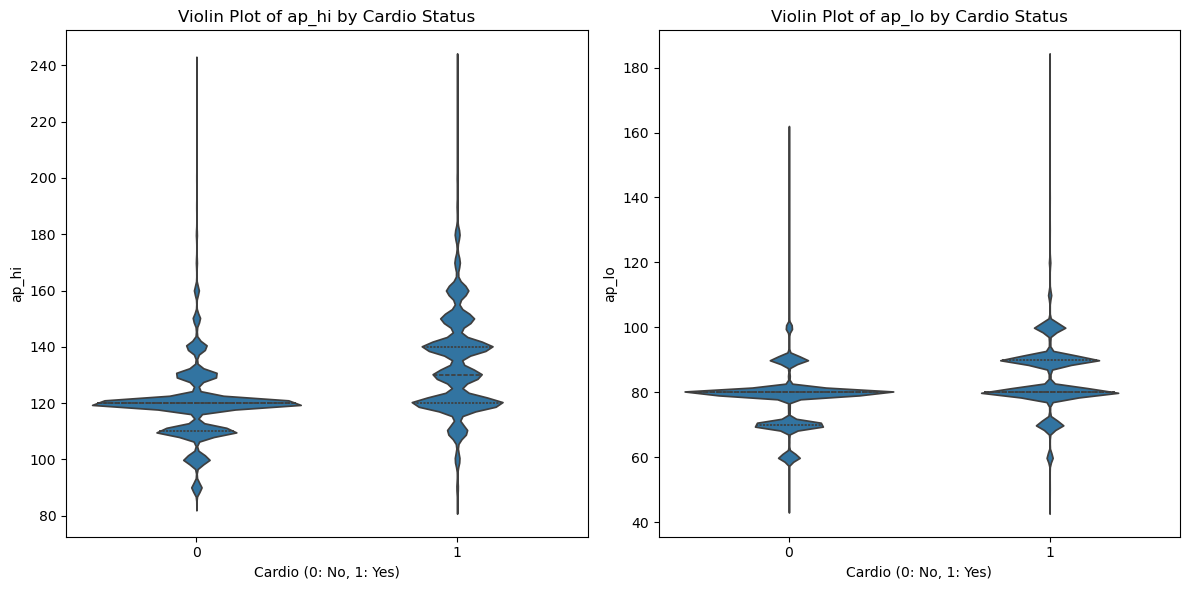

In [35]:
bp_cols = ['ap_hi', 'ap_lo']
plt.figure(figsize=(12, 6))
for i, col in enumerate(bp_cols):
    plt.subplot(1, 2, i + 1)
    # Using df_clean for unscaled, clear values
    sns.violinplot(x='cardio', y=col, data=df_clean, inner='quartile')
    plt.title(f'Violin Plot of {col} by Cardio Status')
    plt.xlabel('Cardio (0: No, 1: Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Q22: Create Distribution Plot for BMI and Age (Post-Processing)


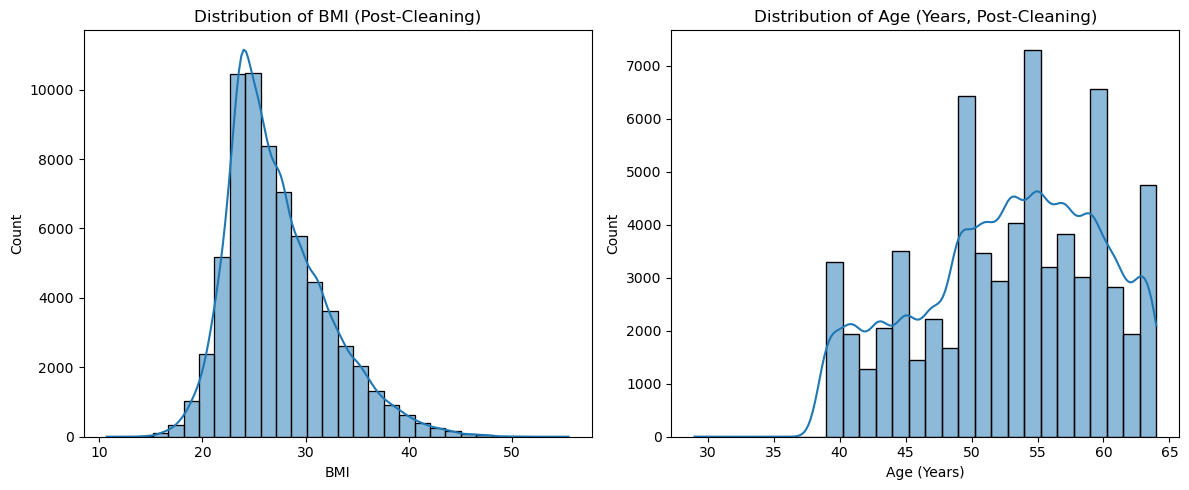

In [37]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['bmi'], kde=True, bins=30)
plt.title('Distribution of BMI (Post-Cleaning)')
plt.xlabel('BMI')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['age_years'], kde=True, bins=df_clean['age_years'].nunique())
plt.title('Distribution of Age (Years, Post-Cleaning)')
plt.xlabel('Age (Years)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Q23: Create Heatmap of Correlation Matrix for Processed Features


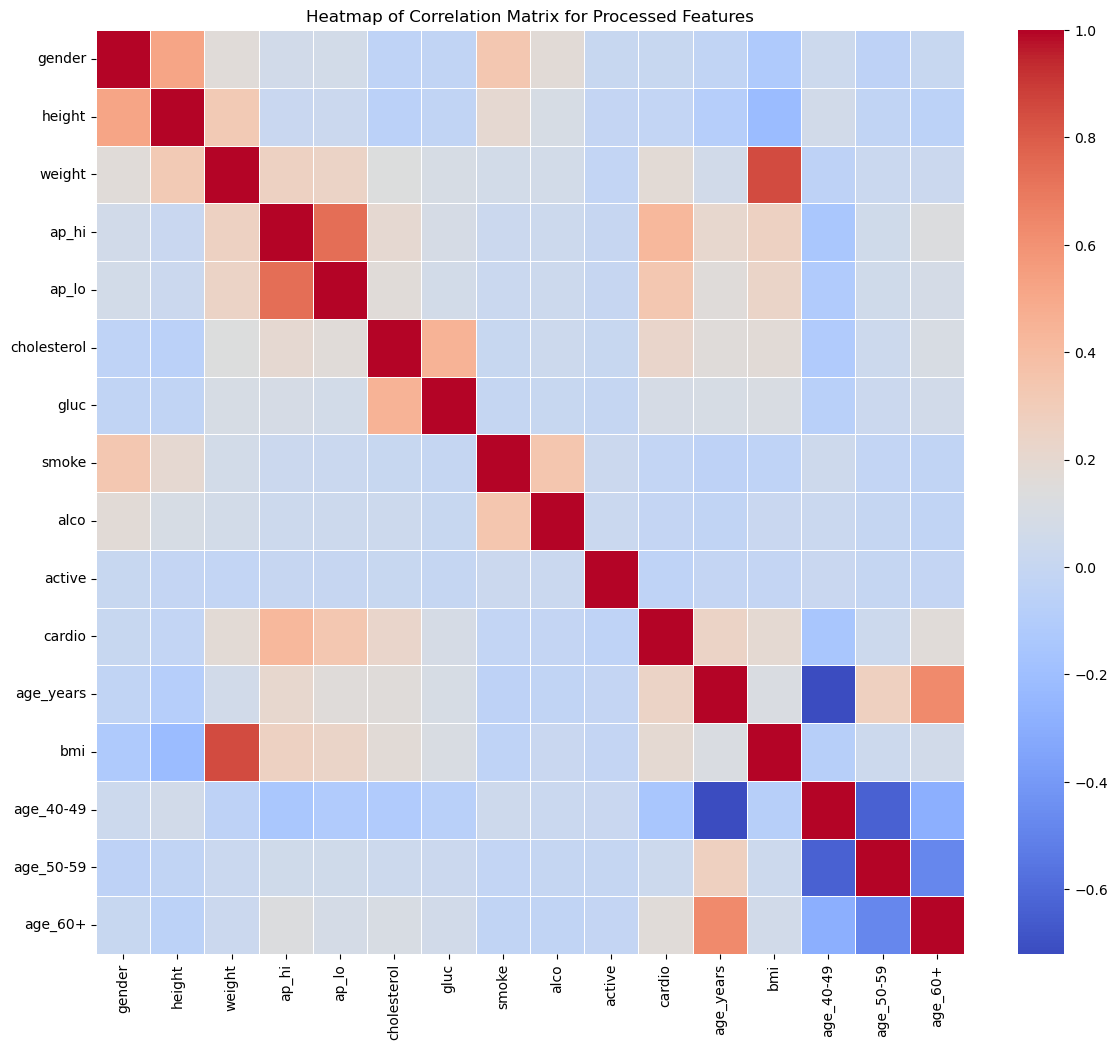

In [39]:
plt.figure(figsize=(14, 12))
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Processed Features')
plt.show()

### Q24: Create Box Plot for Scaled Features Distribution


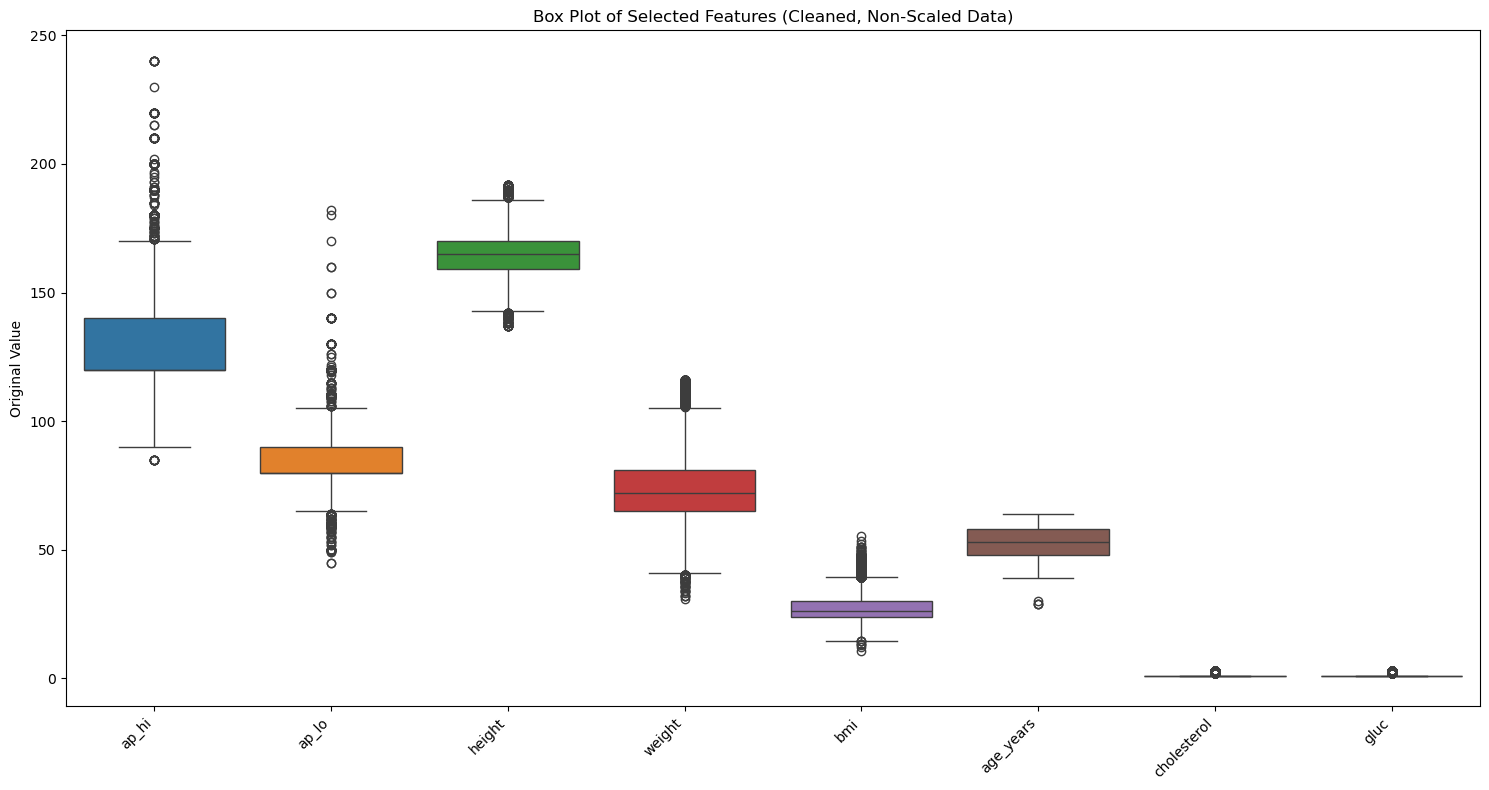

In [41]:
plt.figure(figsize=(15, 8))

features_to_plot = [
    'ap_hi', 'ap_lo', 'height', 'weight',
    'bmi', 'age_years', 'cholesterol', 'gluc'
]

features_to_plot = [f for f in features_to_plot if f in df_clean.columns]

sns.boxplot(data=df_clean[features_to_plot])

plt.title('Box Plot of Selected Features (Cleaned, Non-Scaled Data)')
plt.ylabel('Original Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


---
## 8. Final Dataset Summary


### Q25: Display Final Processed Dataset Summary and Statistics


In [45]:
print("Final Processed Dataset Info (df_clean):")
df_clean.info()

print("\nFinal Processed Dataset Preview (df_clean):")
print(df_clean.head())


Final Processed Dataset Info (df_clean):
<class 'pandas.core.frame.DataFrame'>
Index: 67727 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       67727 non-null  int64  
 1   height       67727 non-null  int64  
 2   weight       67727 non-null  float64
 3   ap_hi        67727 non-null  int64  
 4   ap_lo        67727 non-null  int64  
 5   cholesterol  67727 non-null  int64  
 6   gluc         67727 non-null  int64  
 7   smoke        67727 non-null  int64  
 8   alco         67727 non-null  int64  
 9   active       67727 non-null  int64  
 10  cardio       67727 non-null  int64  
 11  age_years    67727 non-null  int32  
 12  bmi          67727 non-null  float64
 13  age_40-49    67727 non-null  bool   
 14  age_50-59    67727 non-null  bool   
 15  age_60+      67727 non-null  bool   
dtypes: bool(3), float64(2), int32(1), int64(10)
memory usage: 7.2 MB

Final Processed Dataset Prev

---
## 8. Export for Task-3


In [47]:
# Export ONLY the cleaned, non-scaled dataset
df_clean.to_csv('cardio_cleaned.csv', index=False)

print("File exported successfully.")
print(f"Final shape of the exported file: {df_clean.shape}")

File exported successfully.
Final shape of the exported file: (67727, 16)
